# Chap 8 Dimension Reduction


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Projection methods


In [2]:
np.random.seed(42)
m = 60
w_1, w_2 = 0.1,0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi/2 - 0.5
X = np.empty((m,3))

X[:,0] = np.cos(angles) + np.sin(angles)/2 + noise*np.random.rand(m)/2
X[:,1] = np.sin(angles)*0.7 + noise*np.random.randn(m)/2
X[:,2] = X[:,0]*w_1 + X[:,1]*w_2 + np.random.rand(m)

In [3]:
X.shape

(60, 3)

In [4]:
X_matrix = pd.DataFrame(X)
# X_matrix

## PCA by SVD


The **singular value decomposition** (SVD) is a factorization of a real or complex matrix. It generalizes the eigen decomposition of a square normal matrix with an orthonormal eigenbasis to any $m \times n $ matrix $M$.

$$
M = UΣV^*
$$

Where:

- the $m \times n $ complex matrix $M$ is a factorization of the form $UΣV^*$
- $U$ is an $m × m$ complex unitary matrix
- $Σ$ is an $m × n$ rectangular diagonal matrix with non-negative real numbers on the diagonal
- $V$ is an $n × n$ complex unitary matrix.

The diagonal entries $σ_i = Σ_{ii} are known as the **singular values** of $M$. The number of non-zero singular values is equal to the **rank** of $M$. The columns of $U$ and the columns of $V$ are called the **left-singular vectors** and **right-singular vectors** of $M$, respectively.

The SVD is not unique. It is always possible to choose the decomposition so that the singular values $ Σ\_{ii}$ are in descending order. In this case, $Σ$ (but not always $U$ and $V$) is uniquely determined by $M$.


In [5]:
X_centered = X - X.mean(axis=0)
U,s,V_T = np.linalg.svd(X_centered)
c_1 = V_T.T[:,0]
c_2 = V_T.T[:,1]

In [6]:
X_centered.shape

(60, 3)

In [7]:
U.shape

(60, 60)

In [8]:
s

array([7.05506099, 2.98798215, 2.04209023])

In [9]:
V_T 

array([[-0.94360818, -0.26476013, -0.19876034],
       [ 0.33084931, -0.73250113, -0.59496288],
       [ 0.01193027, -0.62717156,  0.77878977]])

In [10]:
c_1.shape,c_2.shape

((3,), (3,))

In [11]:
m,n = X.shape

S= np.zeros(X_centered.shape)
S[:n,:n] = np.diag(s)

In [12]:
S

array([[7.05506099, 0.        , 0.        ],
       [0.        , 2.98798215, 0.        ],
       [0.        , 0.        , 2.04209023],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.

In [13]:
np.allclose(X_centered,U.dot(S).dot(V_T))

True

In [14]:
W_2 = V_T.T[:,:2]
X2D = X_centered.dot(W_2)

In [15]:
print(f"{W_2},\n\n{V_T},\n\n{X2D}")


[[-0.94360818  0.33084931]
 [-0.26476013 -0.73250113]
 [-0.19876034 -0.59496288]],

[[-0.94360818 -0.26476013 -0.19876034]
 [ 0.33084931 -0.73250113 -0.59496288]
 [ 0.01193027 -0.62717156  0.77878977]],

[[-0.76507398 -0.33168158]
 [ 1.48265532  0.57054673]
 [ 1.0805771  -0.01921057]
 [ 0.30232421 -0.60526476]
 [-0.90513931  0.18648104]
 [-0.79842186  0.54702328]
 [-0.47105278  0.7284537 ]
 [ 1.34282445  0.00530485]
 [ 0.50647291 -0.07798973]
 [ 0.96947746 -0.06258005]
 [-0.41314956  0.55618453]
 [ 1.34634769  0.27735024]
 [ 1.33098835 -0.09177379]
 [-0.9399952   0.2664047 ]
 [-1.02070551 -0.0110634 ]
 [-0.90202069  0.3455568 ]
 [-0.91303326 -0.02690949]
 [-0.09011892 -0.59782944]
 [-0.52176961 -0.3762926 ]
 [-1.00044287 -0.3023946 ]
 [ 0.37466292 -0.51444565]
 [-0.90971111  0.15754732]
 [-0.85671069  0.15531324]
 [-0.73762689 -0.20251007]
 [-0.36244576 -0.26362968]
 [ 1.29392605  0.08100081]
 [-1.08504393 -0.17984033]
 [-0.11778305 -0.41423049]
 [ 0.20648304 -0.70088149]
 [-0.52659285

In [16]:
X2D_using_svd = X2D

## PCA using Scikit-Learn


In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [19]:
X2D[:5]

array([[-0.76507398,  0.33168158],
       [ 1.48265532, -0.57054673],
       [ 1.0805771 ,  0.01921057],
       [ 0.30232421,  0.60526476],
       [-0.90513931, -0.18648104]])

In [20]:
X2D_using_svd[:5]

array([[-0.76507398, -0.33168158],
       [ 1.48265532,  0.57054673],
       [ 1.0805771 , -0.01921057],
       [ 0.30232421, -0.60526476],
       [-0.90513931,  0.18648104]])

Notice that running PCA multiple times on slightly different datasets may result in different results. In general the only difference is that some axes may be flipped. In this example, PCA using Scikit-Learn gives the same projection as the one given by the SVD approach, except both axes are flipped:


In [21]:
np.allclose(X2D,-X2D_using_svd)

False

In [22]:
X3D_inv = pca.inverse_transform(X2D)

In [23]:
np.allclose(X3D_inv,X)

False

Compute the reconstruction error


In [24]:
np.mean(np.sum(np.square(X3D_inv - X),axis=1))

0.06950220842428625

In [25]:
# The inverse transform in the SVD approach
X3D_inv_using_svd = X2D_using_svd.dot(V_T[:2,:])

The reconstructions from both methods are not identical because Scikit-Learn's `PCA` class automatically takes care of reversing the mean centering, but if we subtract the mean, we get the same reconstruction:


In [26]:
np.allclose(X3D_inv_using_svd,X3D_inv - pca.mean_)

True

In [27]:
# PCA components

pca.components_

array([[-0.94360818, -0.26476013, -0.19876034],
       [-0.33084931,  0.73250113,  0.59496288]])

In [28]:
V_T[:2]

array([[-0.94360818, -0.26476013, -0.19876034],
       [ 0.33084931, -0.73250113, -0.59496288]])

In [29]:
# Explained Variance Ratio
pca.explained_variance_ratio_

array([0.79166945, 0.14200327])

### PLOT

[Utility class to draw 3D arrows from stack overflow](http://stackoverflow.com/questions/11140163)


In [30]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d, Axes3D


In [31]:
class Arrow3D(FancyArrowPatch):
    def __init__(self,xs,ys,zs,*args,**kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), (0, 0),*args,**kwargs)
        self._verts3d = xs,ys,zs

    def draw(self,renderer):
        xs3d,ys3d,zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d,renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


Express the plane as a function of x and y:


In [32]:
def make_mesh(lims,h):
    x = np.linspace(lims[0],lims[1],h)
    y = np.linspace(lims[2],lims[3],h)
    xx, yy = np.meshgrid(x,y)
    return xx, yy

In [33]:
# Set parameters:

lims = [-1.8,1.8,-1.3,1.3,-1,1]
x_1,x_2 = make_mesh(lims,h=10)

C = pca.components_
R = C.T.dot(C)
z = (R[0,2]*x_1+ R[1,2]*x_2)/(1-R[2,2])

/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_5532/1951200360.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]],


[(-1.8, 1.8), (-1.3, 1.3)]

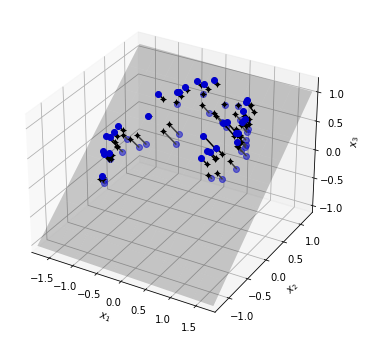

In [34]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x_1, x_2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)

# ax.add_artist(
#     Arrow3D([0, C[0, 0]], [0, C[0, 1]], [0, C[0, 2]],
#             mutation_scale=15,
#             lw=1,
#             arrowstyle="-|>",
#             color="k"))
# ax.add_artist(
#     Arrow3D([0, C[1, 0]], [0, C[1, 1]], [0, C[1, 2]],
#             mutation_scale=15,
#             lw=1,
#             arrowstyle="-|>",
#             color="k"))
# ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]],
                "k-",
                color="#505050")

ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set(xlabel="$x_1$", ylabel="$x_2$", zlabel="$x_3$")
ax.set(xlim=lims[0:2], ylim=lims[2:4])

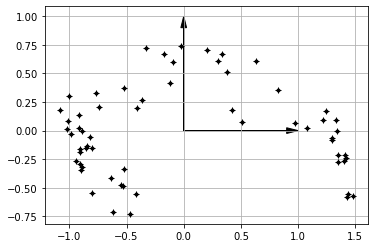

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111,aspect ='equal')

ax.plot(X2D[:,0], X2D[:,1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.arrow(0,
         0,
         0,
         1,
         head_width=0.05,
         length_includes_head=True,
         head_length=0.1,
         fc='k',
         ec='k')
ax.arrow(0,
         0,
         1,
         0,
         head_width=0.05,
         length_includes_head=True,
         head_length=0.1,
         fc='k',ec='k')
ax.grid(True)


## Manifold Learning


In [36]:
from sklearn.datasets import make_swiss_roll

In [37]:
X ,t = make_swiss_roll(n_samples=1000,noise=0.2,random_state=42)

In [38]:
# X
# t

[Text(0.5, 0, '$x_1$'),
 Text(0.5, 0, '$x_2$'),
 Text(0.5, 0, '$x_3$'),
 (-11.5, 14.0),
 (-2.0, 23.0),
 (-12.0, 15.0)]

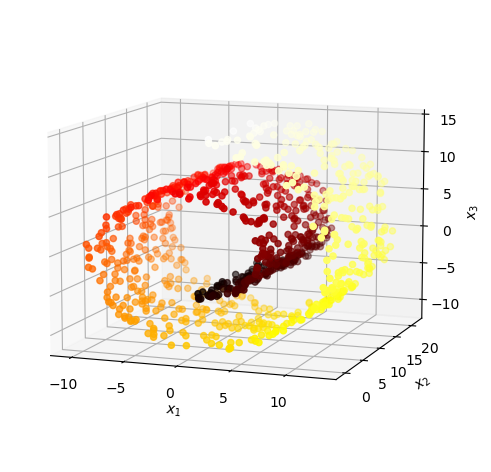

In [39]:
lims = [-11.5,14,-2,23,-12,15]

fig = plt.figure(figsize=(7,6),dpi=100)
ax =fig.add_subplot(111,projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2],c=t,cmap=plt.cm.hot)
ax.view_init(10,-70)
ax.set(xlabel="$x_1$",
       ylabel="$x_2$",
       zlabel="$x_3$",
       xlim=lims[0:2],
       ylim=lims[2:4],
       zlim=lims[4:6])
    

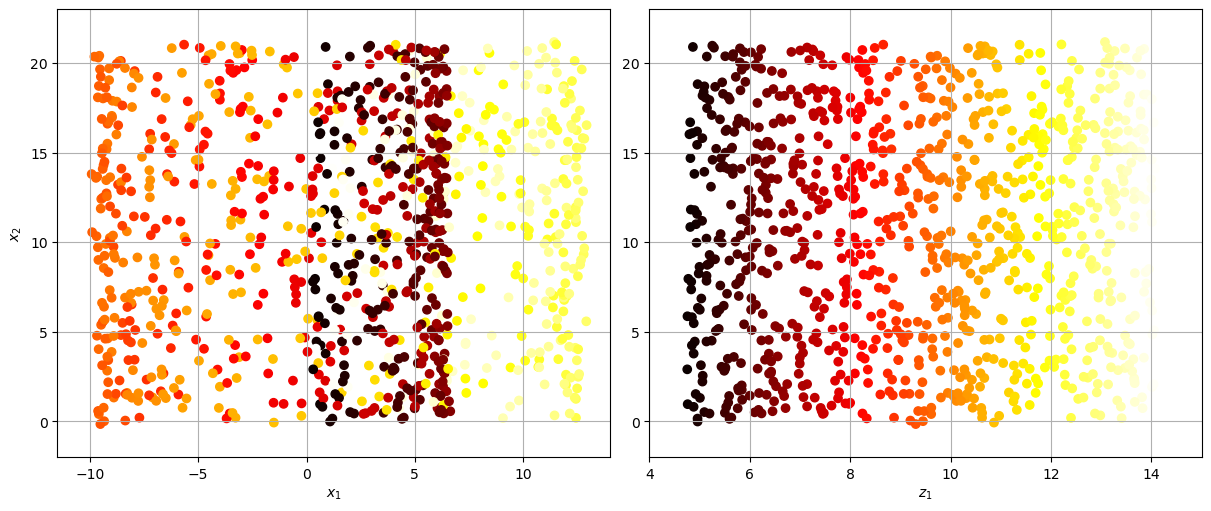

In [40]:
_, axes =  plt.subplots(1,2,figsize=(12,5),dpi=100,constrained_layout=True)

axes[0].scatter(X[:,0], X[:,1],c=t,cmap=plt.cm.hot)
axes[0].axis(lims[:4])
axes[0].set(xlabel="$x_1$",ylabel="$x_2$")
axes[0].grid()


axes[1].scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
axes[1].axis([4,15] + lims[2:4])
axes[1].set(xlabel="$z_1$")
axes[1].grid()

In [41]:
lims = [-11.5, 14, -2, 23, -12, 15]

x2, x3 = make_mesh(lims=lims[2:6], h=10)

In [42]:
from matplotlib import gridspec

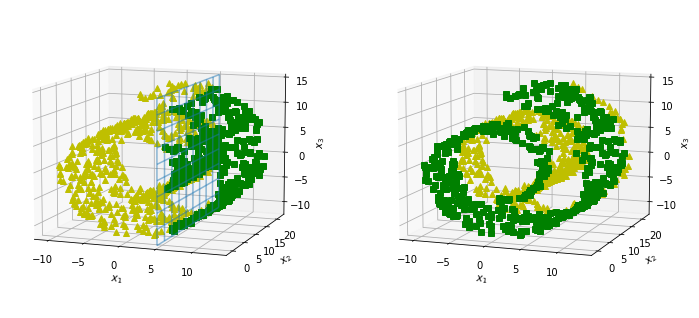

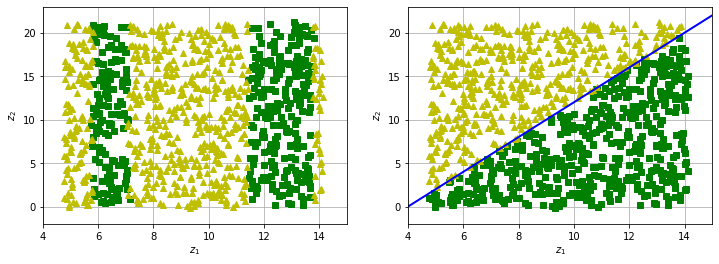

In [43]:
fig = plt.figure(figsize=(12, 8))

pos_classes = [X[:, 0] > 5, 2 * (t[:] - 4) > X[:, 1]]

for ind, positive_class in enumerate(pos_classes):

    ax = plt.subplot(121 + ind, projection='3d')
    X_pos = X[positive_class]
    X_neg = X[~positive_class]
    ax.view_init(10, -70)
    ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
    ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")

    if ind == 0:
        ax.plot_wireframe(5, x2, x3, alpha=0.5)

    ax.set(xlabel="$x_1$",
           ylabel="$x_2$",
           zlabel="$x_3$",
           xlim=lims[0:2],
           ylim=lims[2:4],
           zlim=lims[4:6])

plt.show()

fig = plt.figure(figsize=(12, 4))

for ind, positive_class in enumerate(pos_classes):
    ax = plt.subplot(121 + ind)
    ax.plot(t[positive_class], X[positive_class, 1], "gs")
    ax.plot(t[~positive_class], X[~positive_class, 1], "y^")
    ax.set(xlabel="$z_1$", ylabel="$z_2$")
    ax.axis([4, 15] + lims[2:4])
    ax.grid(1)
    if ind == 1:
        ax.plot([4, 15], [0, 22], "b-", lw=2)

plt.show()


## PCA


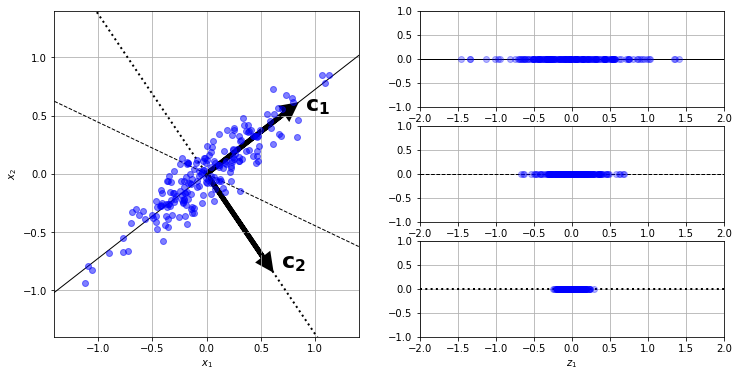

In [44]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0], [0, 1]]))  # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle),
                                            np.cos(angle)]])  # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi / 6), np.sin(angle - 2 * np.pi / 6)])
u3 = np.array([np.cos(angle - np.pi / 2), np.sin(angle - np.pi / 2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(12, 6))
ax = plt.subplot2grid((3, 2), (0, 0), rowspan=3)

ax.plot([-1.4, 1.4], [-1.4 * u1[1] / u1[0], 1.4 * u1[1] / u1[0]], "k-", lw=1)
ax.plot([-1.4, 1.4], [-1.4 * u2[1] / u2[0], 1.4 * u2[1] / u2[0]], "k--", lw=1)
ax.plot([-1.4, 1.4], [-1.4 * u3[1] / u3[0], 1.4 * u3[1] / u3[0]], "k:", lw=2)
ax.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
ax.axis([-1.4, 1.4, -1.4, 1.4])

arrow_prop = {
    'head_width': 0.1,
    'lw': 5,
    'length_includes_head': True,
    'head_length': 0.1,
    'fc': 'k',
    'ec': 'k'
}

ax.arrow(0, 0, u1[0], u1[1], **arrow_prop)
ax.arrow(0, 0, u3[0], u3[1], **arrow_prop)
ax.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
ax.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
ax.set(xlabel="$x_1$", ylabel="$x_2$")
ax.grid(1)

ax = plt.subplot2grid((3, 2), (0, 1))
ax.plot([-2, 2], [0, 0], "k-", lw=1)
ax.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
ax.axis([-2, 2, -1, 1])
ax.grid(1)

ax = plt.subplot2grid((3, 2), (1, 1))
ax.plot([-2, 2], [0, 0], "k--", lw=1)
ax.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
ax.axis([-2, 2, -1, 1])
ax.grid(1)

ax = plt.subplot2grid((3, 2), (2, 1))
ax.plot([-2, 2], [0, 0], "k:", lw=2)
ax.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
ax.axis([-2, 2, -1, 1])
ax.set(xlabel="$z_1$")
ax.grid(1)

plt.show()

## MNIST compression


In [75]:
X = pd.read_feather('../data/mnist_784_X.feather')
y = pd.read_feather('../data/mnist_784_y.feather')

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [77]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

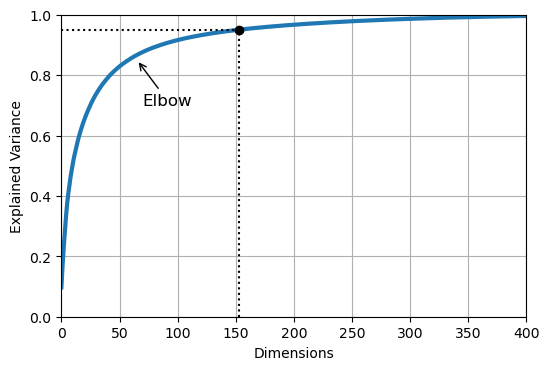

In [65]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.axis([0, 400, 0, 1])
ax.set(xlabel="Dimensions", ylabel="Explained Variance")
ax.plot(cumsum, lw=3)
ax.plot([d, d], [0, 0.95], "k:")
ax.plot([0, d], [0.95, 0.95], "k:")
ax.plot(d, 0.95, "ko")
ax.annotate("Elbow",
            xy=(65, 0.85),
            xytext=(70, 0.7),
            arrowprops=dict(arrowstyle="->"),
            fontsize='large')
ax.grid(1)

plt.show()

In [66]:
# Inverse and inverse error
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [67]:
pca.n_components_

784

In [68]:
def plot_digit(ax, data):
    image = data.reshape(28, 28)
    ax.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    ax.axis("off")

In [69]:
# fig = plt.figure(figsize=(8, 8))
# outer_grid = fig.add_gridspec(2, 2, wspace=0.2, hspace=0.2)

# out_grids = [(0, 0), (0, 1)]
# titles = ["Original", "Compressed"]

# for X_subset, (a, b), title in zip([X_train, X_recovered], out_grids, titles):
#     inner_grid = outer_grid[a, b].subgridspec(5, 5)
#     axes = inner_grid.subplots()

#     X_c = X_subset[::2100]

#     for ind, ax in enumerate(axes.flatten()):
#         plot_digit(ax, X_c[ind, :])

# plt.show()

In [ ]:
def plot_digit(ax, data):
    image = data.reshape(28, 28)
    ax.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    ax.axis("off")

In [ ]:
# fig = plt.figure(figsize=(8, 8))
# outer_grid = fig.add_gridspec(2, 2, wspace=0.2, hspace=0.2)

# out_grids = [(0, 0), (0, 1)]
# titles = ["Original", "Compressed"]

# for X_subset, (a, b), title in zip([X_train, X_recovered], out_grids, titles):
#     inner_grid = outer_grid[a, b].subgridspec(5, 5)
#     axes = inner_grid.subplots()

#     X_c = X_subset[::2100]

#     for ind, ax in enumerate(axes.flatten()):
#         plot_digit(ax, X_c[ind, :])

# plt.show()

## Incremental PCA


In [70]:
from sklearn.decomposition import IncrementalPCA

In [71]:
n_batches = 100

inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train,n_batches):
    print(".+.",end="~")
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~.+.~

In [72]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

In [73]:
# fig = plt.figure(figsize=(8, 8))
# outer_grid = fig.add_gridspec(2, 2, wspace=0.2, hspace=0.2)

# out_grids = [(0, 0), (0, 1)]
# titles = ["Original", "Compressed"]

# for X_subset, (a, b), title in zip([X_train, X_recovered_inc_pca], out_grids,
#                                    titles):
#     inner_grid = outer_grid[a, b].subgridspec(5, 5)
#     axes = inner_grid.subplots()

#     X_c = X_subset[::2100]

#     for ind, ax in enumerate(axes.flatten()):
#         plot_digit(ax, X_c[ind, :])

# plt.show()

## Time complexity


Let's time regular PCA against Incremental PCA and Randomized PCA, for various number of principal components:


In [74]:
import time

In [78]:
for n_components in (2,10,154):
    print("n_components=", n_components)
    regular_pca = PCA(n_components=n_components,svd_solver="full")
    inc_pca = IncrementalPCA(n_components=n_components,batch_size=500)
    rnd_pca = PCA(n_components=n_components,random_state=42,svd_solver="randomized")
    names = ["PCA", "Incremental PCA","Randomized PCA"]
    pcas = [regular_pca,inc_pca,rnd_pca]

    for name,pca in zip(names,pcas):
        t_1 = time.time()
        pca.fit(X_train)
        t_2 = time.time()
        t_d = round((t_2 - t_1),3)
        print(f"{name}:{t_d} seconds")



n_components= 2
PCA:9.59 seconds
Incremental PCA:28.492 seconds
Randomized PCA:0.849 seconds
n_components= 10
PCA:9.412 seconds
Incremental PCA:26.701 seconds
Randomized PCA:1.24 seconds
n_components= 154
PCA:10.409 seconds
Incremental PCA:49.76 seconds
Randomized PCA:5.758 seconds


Compare the PCA and Randomized PCA for datasets in different sizes


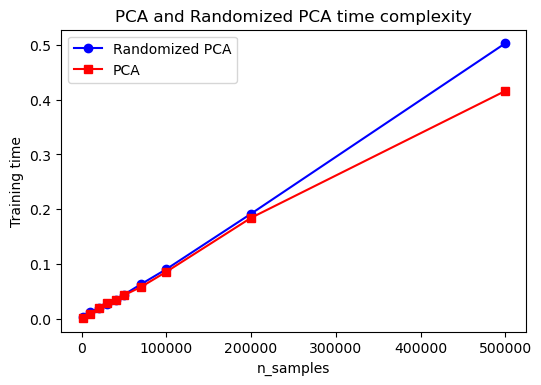

In [81]:
times_rpca = []
times_pca = []

sizes =[1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]

_,ax = plt.subplots(figsize=(6,4),dpi=100)

for n_samples in sizes:
    X = np.random.randn(n_samples,5)
    # Randomized PCA
    pca = PCA(n_components=2,svd_solver="randomized",random_state=42)
    t_1 = time.time()
    pca.fit(X)
    t_2 = time.time()
    times_rpca.append(t_2 - t_1)
    # Regular PCA
    ca = PCA(n_components=2,svd_solver="full",random_state=42)
    t_1 = time.time()
    pca.fit(X)
    t_2 = time.time()
    times_pca.append(t_2 - t_1)

ax.plot(sizes,times_rpca,"b-o", label="Randomized PCA")
ax.plot(sizes,times_pca,"r-s", label="PCA")
ax.set(xlabel="n_samples",ylabel="Training time",title="PCA and Randomized PCA time complexity")
ax.legend(loc="upper left")
plt.show()

Increasing the volume of the dataset


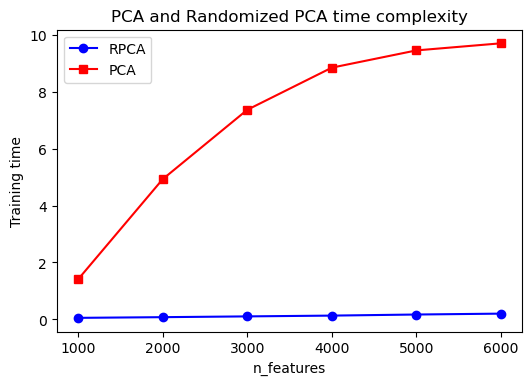

In [83]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]

for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components=2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(sizes, times_rpca, "b-o", label="RPCA")
ax.plot(sizes, times_pca, "r-s", label="PCA")
ax.set(xlabel="n_features",
       ylabel="Training time",
       title="PCA and Randomized PCA time complexity")
ax.legend(loc="upper left")
plt.show()

## Kernel PCA


In [84]:
from sklearn.decomposition import KernelPCA

In [85]:
X, t = make_swiss_roll(n_samples=1000,noise=0.2,random_state=42)

In [86]:
rbf_pca = KernelPCA(n_components=2,kernel="rbf",gamma=0.04)

In [87]:
X_reduced = rbf_pca.fit_transform(X)

In [88]:
# def the linear kernel PCA, rbf kernelPCA,sigmoid kernel PCA

lin_pca = KernelPCA(n_components=2,kernel='linear',fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2,kernel='rbf',gamma=0.0433,fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2,kernel='sigmoid',gamma=0.001,coef0=1,fit_inverse_transform=True)

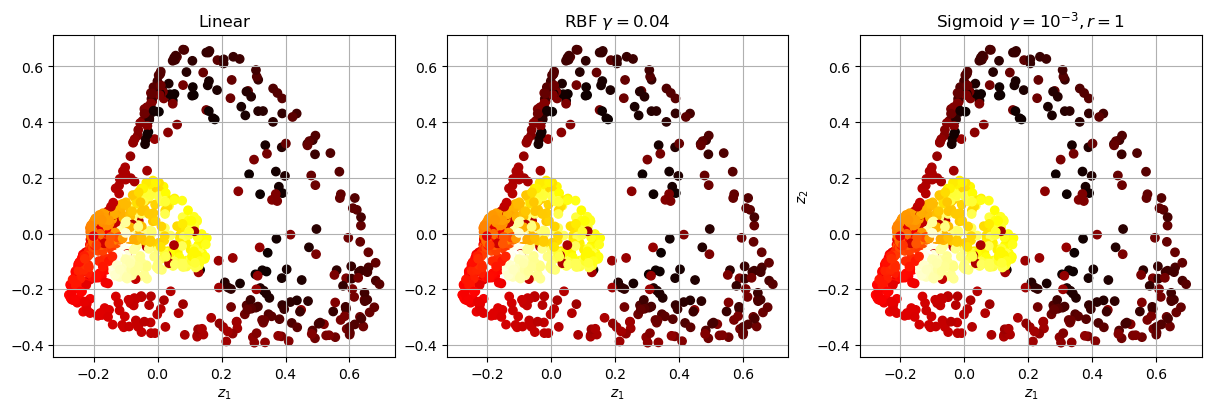

In [99]:
y = t >   6.9 # why?????

_, axes = plt.subplots(1,3,figsize=(12,4),dpi=100,constrained_layout=True)

titles = ["Linear","RBF $\gamma=0.04$","Sigmoid $\gamma=10^{-3},r=1$"]
pcas =[lin_pca,rbf_pca,sig_pca]

for title,pca,ax in zip(titles,pcas,axes.flatten()):
    ax.annotate("Elbow",xy=(65,0.85),xytext=(70,0.7),arrowprops=dict(arrowstyle="->"),fontsize='large')
    X_reduced_rbf = X_reduced

    ax.set(xlabel='$z_1$',title=title)
    ax.scatter(X_reduced[:,0],X_reduced[:,1],c=t,cmap=plt.cm.hot)

    ax.grid(1)

axes[2].set(ylabel='$z_2$')
plt.show()

In [101]:
X_reduced = rbf_pca.fit_transform(X)

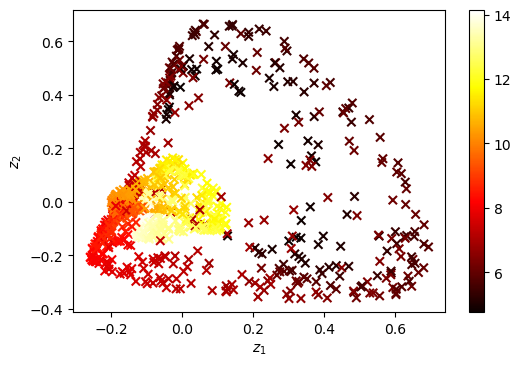

In [114]:
_, ax = plt.subplots(figsize =(6,4),dpi=100)

sc = ax.scatter(X_reduced[:,0],X_reduced[:,1],c=t,cmap=plt.cm.hot,marker="x")
ax.set(xlabel="$z_1$", ylabel="$z_2$")

plt.colorbar(sc) # I love it
plt.show()

Tuning parameters


In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [121]:
clf = Pipeline([("kpca", KernelPCA(n_components=2)),
                ("log_reg", LogisticRegression(solver="lbfgs"))])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [124]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [125]:
# let's rock with the best params
rbf_pca = KernelPCA(n_components =2 ,kernel='rbf',gamma=0.0433,fit_inverse_transform=True)

In [132]:
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [133]:
from sklearn.metrics import mean_squared_error

In [134]:
mean_squared_error(X,X_preimage)

32.786308795766125

In [ ]:
asd